In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.shape

(80, 9)

In [4]:
df.head(3)

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.7,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.8,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.9,NO,NO


In [5]:
df.tail(2)

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
78,79,43834,636636,2.75382,NO,YES,0.79,YES,YES
79,80,40852,575008,3.52768,NO,YES,0.54,YES,YES


In [6]:
df.Passengers.corr(df.Promotion_Budget)

0.9658510283900132

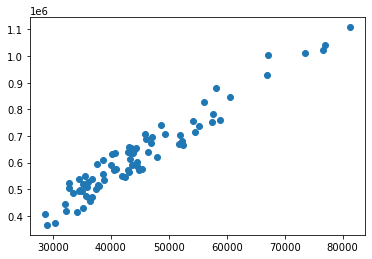

In [7]:
plt.scatter(df.Passengers, df.Promotion_Budget)

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Promotion_Budget', ylabel='Passengers'>

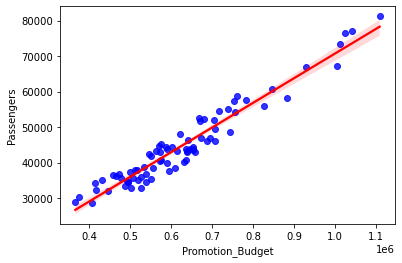

In [8]:
sns.regplot( df.Promotion_Budget,df.Passengers, order=1, scatter_kws= {"color":"blue"}, line_kws = {"color":"red"})

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = df[['Promotion_Budget']]
y = df[['Passengers']]

In [11]:
X.shape

(80, 1)

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X, y) # Model Training

LinearRegression()

In [14]:
y_hat = lm.predict(X)

In [15]:
MSE = np.mean((y - y_hat)**2)

In [16]:
MSE

Passengers    8.415771e+06
dtype: float64

In [17]:
RMSE = np.sqrt(MSE)

In [18]:
RMSE

Passengers    2900.994771
dtype: float64

In [19]:
lm.score(X , y) # r_squared / coeff. of determination

0.9328682090420465

In [20]:
np.sqrt(lm.score(X , y))

0.9658510283900134

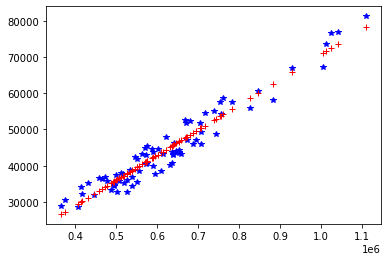

In [21]:
plt.plot(X , y, 'b*')
plt.plot(X, y_hat, 'r+')

In [22]:
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
r2_score(y, y_hat)

0.9328682090420465

In [24]:
np.sqrt(mean_squared_error(y , y_hat))

2900.9947714502887

In [25]:
lm.intercept_ # beta_0

array([1259.60583201])

In [26]:
lm.coef_ # beta_1

array([[0.06952969]])

In [27]:
Passengers  = lm.intercept_ + lm.coef_ * 55000

In [28]:
Passengers

array([[5083.73852289]])

In [29]:
import statsmodels.api as sm

In [32]:
model2 = sm.OLS(y, X)

In [33]:
result = model2.fit()

In [34]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.968e+04
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                    1.70e-96
Time:                        13:08:48   Log-Likelihood:                         -751.78
No. Observations:                  80   AIC:                                      1506.
Df Residuals:                      79   BIC:                                      1508.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [35]:
x1 = sm.add_constant(X)

In [36]:
x1

,const,Promotion_Budget
0,1.0,517356
1,1.0,646086
2,1.0,638330
3,1.0,506492
4,1.0,609658
...,...,...
75,1.0,927696
76,1.0,1108254
77,1.0,638162
78,1.0,636636


In [37]:
import statsmodels.formula.api as smf

In [38]:
model = smf.ols(formula = 'Passengers ~ Promotion_Budget', data = df)

In [39]:
result = model.fit()

In [40]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.66e-47
Time:                        13:59:44   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071  

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Promotion_Budget', ylabel='Passengers'>

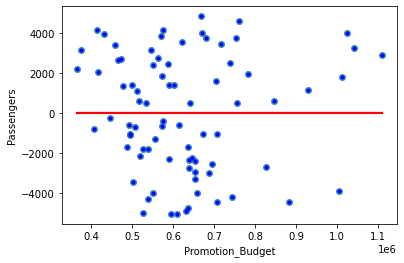

In [41]:
residual = y - y_hat
plt.plot(X , residual, 'b.')
sns.regplot(X, residual, order = 1, ci=None, line_kws={'color':'r'})

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

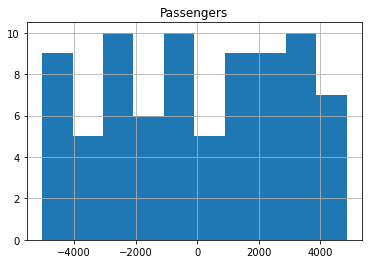

In [42]:
residual.hist()

In [43]:
res = residual.values.ravel()
res.shape

(80,)

0.9578603364111823

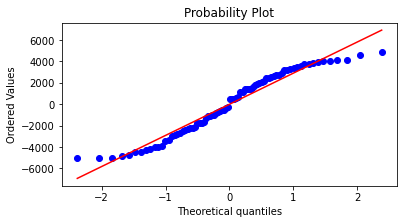

In [44]:
#Checming Normality Condition
import scipy as sp
fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)
r**2

In [45]:
resi = result.resid
preidicted_value = result.fittedvalues
stand_resid = result.resid_pearson
influence = result.get_influence()
leverage = influence.hat_matrix_diag

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Promotion_Budget'>

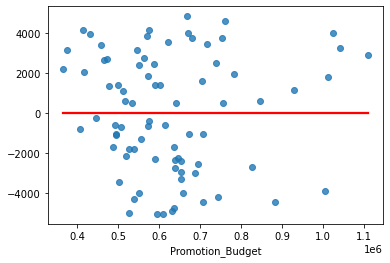

In [46]:
sns.regplot(X, resi, order = 1, ci=None, line_kws={'color':'r'})

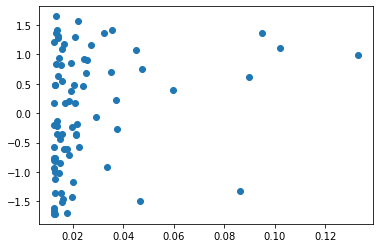

In [47]:
plt.scatter(leverage, stand_resid)

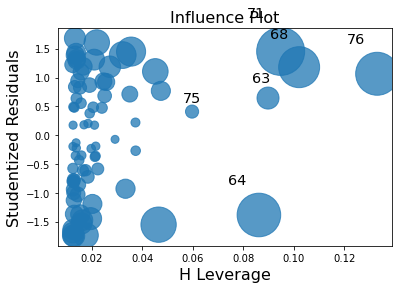

In [48]:
import statsmodels.api as sm
sm.graphics.influence_plot(result, criterion = 'cooks');